In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_CNN = pd.read_csv("data/SimpleCNN/metrics.csv")
df_CNN_c = pd.read_csv("data/SimpleCNN_compress/metrics.csv")
df_mlp_c = pd.read_csv("data/SimpleMLP_compress/metrics.csv")
df_mlp = pd.read_csv("data/SimpleMLP/metrics.csv")
df_seq2pp = pd.read_csv("data/seq2pp/metrics.csv")

In [7]:
# 1. Agregar columna para identificar el origen/modelo
df_CNN = df_CNN.assign(model="CNN")
df_CNN_c = df_CNN_c.assign(model="CNN")
df_mlp = df_mlp.assign(model="MLP")
df_mlp_c = df_mlp_c.assign(model="MLP")
df_seq2pp = df_seq2pp.assign(model="seq2pp")

# 2. Concatenar todos los DataFrames
df_all = pd.concat(
    [df_CNN, df_CNN_c, df_mlp, df_mlp_c, df_seq2pp],
    axis=0,
    ignore_index=True,
    sort=False,  # sort=False para mantener el orden original de las columnas
)

cols = ["model"] + [c for c in df_all.columns if c != "model"]
df_all = df_all[cols]

In [ ]:
df_all[]

In [8]:
df_all

,model,run_name,exp,run,arc_features,arc_num_conv,arc_latent_volume,arc_num_params,train_loss,valid_loss,...,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,arc_skip,arc_encoder_blocks
0,CNN,nc2_f16_32_64,SimpleCNN,nc2_f16_32_64,"[16, 32, 64]",2.0,2048.0,287009,0.014548,0.145848,...,0.983191,0.901115,0.981020,0.801948,0.888887,0.0,0.0,0.0,NaN,NaN
1,CNN,nc2_f8_32_64,SimpleCNN,nc2_f8_32_64,"[8, 32, 64]",2.0,2048.0,285521,0.011068,0.128251,...,0.987329,0.904229,0.985725,0.825287,0.893458,0.0,0.0,0.0,NaN,NaN
2,CNN,nc2_f8_16_64,SimpleCNN,nc2_f8_16_64,"[8, 16, 64]",2.0,2048.0,279665,0.013865,0.132113,...,0.983919,0.923999,0.981864,0.816265,0.913555,0.0,0.0,0.0,NaN,NaN
3,CNN,nc2_f8_16_32,SimpleCNN,nc2_f8_16_32,"[8, 16, 32]",2.0,1024.0,137617,0.012824,0.145363,...,0.985174,0.904306,0.983277,0.801237,0.891113,0.0,0.0,0.0,NaN,NaN
4,CNN,nc2_f4_32_64,SimpleCNN,nc2_f4_32_64,"[4, 32, 64]",2.0,2048.0,284921,0.011339,0.140335,...,0.987202,0.906359,0.985588,0.807790,0.894622,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,seq2pp,s2pp_nc1_skip_0_f16,seq2pp,s2pp_nc1_skip_0_f16,[16],1.0,2048.0,257,0.168001,0.174090,...,0.735457,0.684157,0.683485,0.629553,0.648153,0.0,0.0,0.0,0.0,0.0
258,seq2pp,s2pp_nc1_skip_1_f8,seq2pp,s2pp_nc1_skip_1_f8,[8],1.0,1024.0,129,0.167813,0.172686,...,0.736924,0.663970,0.682723,0.630660,0.639505,0.0,0.0,0.0,1.0,0.0
259,seq2pp,s2pp_nc1_skip_0_f8,seq2pp,s2pp_nc1_skip_0_f8,[8],1.0,1024.0,129,0.167813,0.172707,...,0.736924,0.663970,0.682723,0.630660,0.639505,0.0,0.0,0.0,0.0,0.0
260,seq2pp,s2pp_nc1_skip_1_f4,seq2pp,s2pp_nc1_skip_1_f4,[4],1.0,512.0,65,0.169695,0.176204,...,0.734536,0.659719,0.680818,0.628404,0.630682,0.0,0.0,0.0,1.0,0.0


Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,88.0,0.975739,0.023385,0.981002,0.826692,0.990199
MLP,38.0,0.856273,0.054038,0.863983,0.659956,0.937200
seq2pp,136.0,0.873821,0.076843,0.891428,0.680818,0.974099


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,88.0,0.812242,0.016274,0.813139,0.733423,0.849028
MLP,38.0,0.740414,0.042969,0.733895,0.610245,0.821614
seq2pp,136.0,0.741698,0.047433,0.749355,0.628404,0.827321


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,88.0,0.899143,0.017418,0.900642,0.823042,0.928569
MLP,38.0,0.852995,0.048928,0.861865,0.662954,0.918517
seq2pp,136.0,0.784992,0.057210,0.796453,0.630682,0.878036


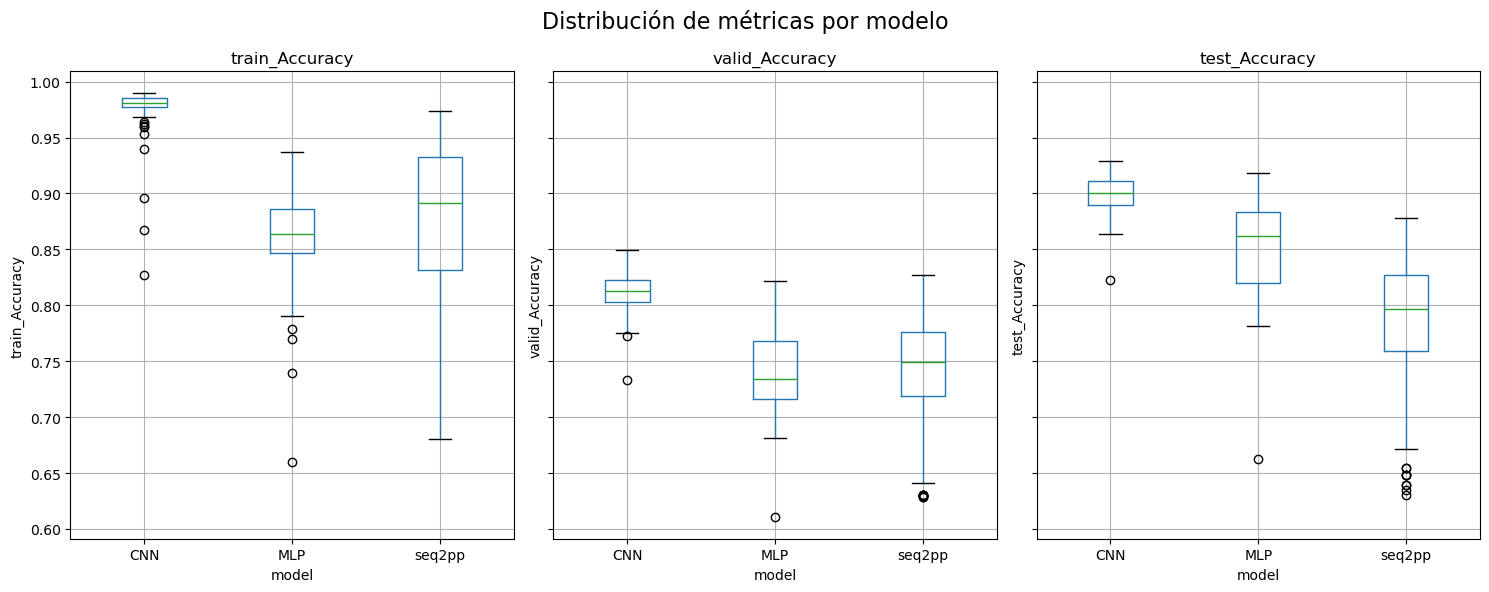

In [ ]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):

    stats[metric] = df_all.groupby("model")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    df_all.boxplot(column=metric, by="model", ax=ax[i])
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

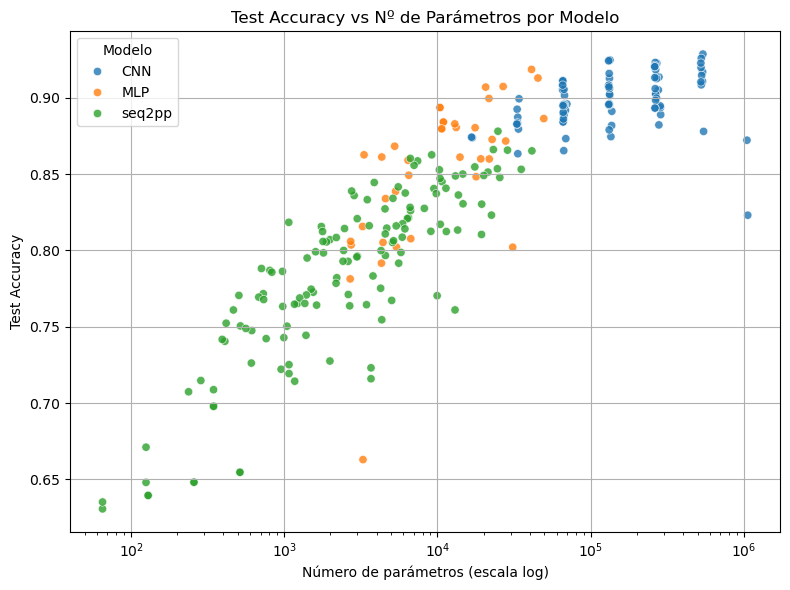

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="test_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

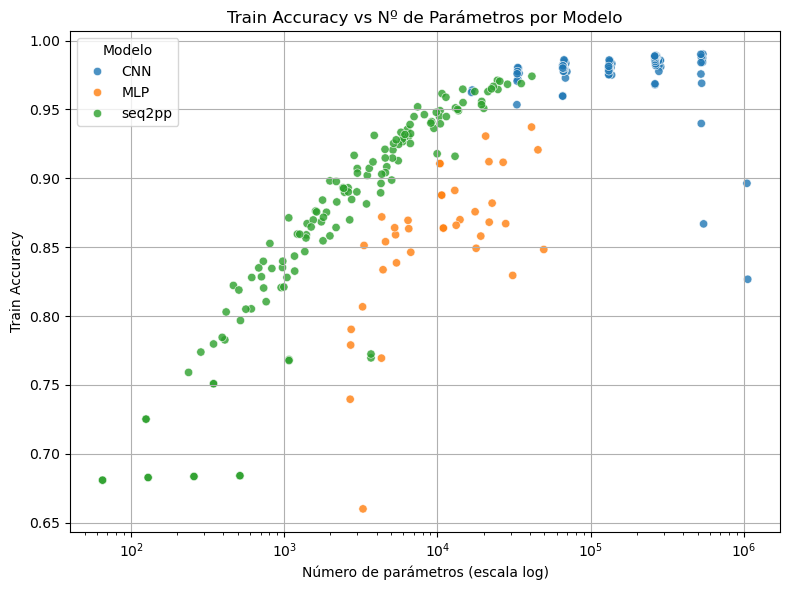

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

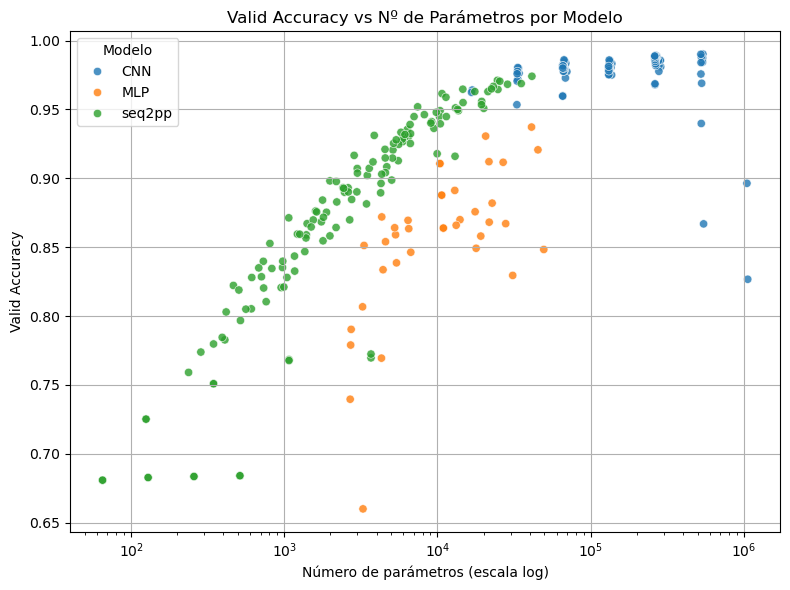

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Valid Accuracy")
plt.title("Valid Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()